In [1]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import run_to_steady_state, get_straub_fig10_data, get_straub_fig10_init
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
from PySDM.physics.constants import si
import pickle as pkl
import time

In [2]:
(straub_x, straub_log_y, straub_dvdlnr_ss) = get_straub_fig10_data()
(straub_x_init, straub_y_init, straub_dvdlnr_init) = get_straub_fig10_init()

Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
ran Straub2010 for 256 superdroplets in 43.564152240753174 sec


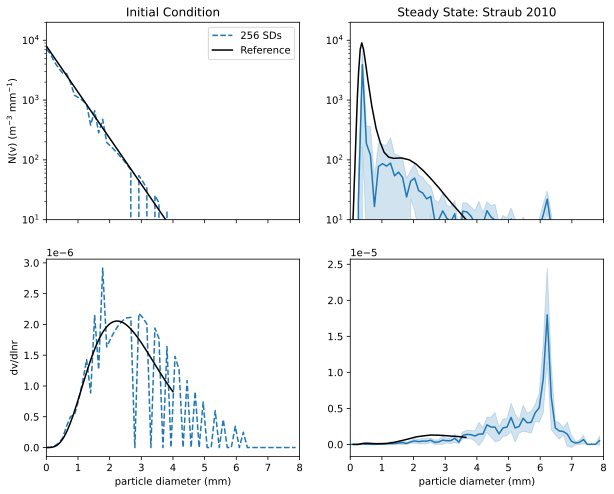

HTML(value="<a href='./straub_fig10.pdf' target='_blank'>./straub_fig10.pdf</a><br>")

In [6]:
run_sims = True
n_sds = [2**8]#, 2**10, 2**12]
steps = [0, 7200]
nruns = 5

(fig, ax) = pyplot.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,8))   

# Obtain data
parameterization = 'Straub2010'
for n_sd in n_sds:
    if run_sims:
        t1 = time.time()
        run_to_steady_state(parameterization, n_sd, steps, nruns, dt=5*si.s)
        t2 = time.time()
        print('ran '+parameterization+' for '+str(n_sd)+' superdroplets in '+str(t2 - t1)+' sec')
    data_filename = 'data/steadystate_' + parameterization + '_' + str(n_sd) + 'sd.pkl'
    with open(data_filename, 'rb') as handle:
        (x, y_ensemble, y2_ensemble, rates) = pkl.load(handle)
    
    # statistics
    # mass density
    y_mean = np.nanmean(y_ensemble, axis=0)
    y_std = np.nanstd(y_ensemble, axis=0)

    # number density
    y2_mean = np.nanmean(y2_ensemble, axis=0)
    y2_std = np.nanstd(y2_ensemble, axis=0)

    # Plotting
    cmap = matplotlib.cm.get_cmap('viridis')
    dr = np.diff(x) * si.um
    dr = np.concatenate([dr, [dr[-1]]])

    legend_entries = []

    color = next(ax[0][0]._get_lines.prop_cycler)['color']
    for (j, step) in enumerate(steps):  # pylint: disable=protected-access
        if step != 0:
            lbl = str(n_sd) + ' SDs'
            ax[0][1].plot(2*x*si.mm, y2_mean[j]/2/dr * si.mm,linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[0][1].fill_between(2*x*si.mm, y2_mean[j]/2/dr * si.mm - y2_std[j]/2/dr * si.mm, 
                               y2_mean[j]/2/dr * si.mm + y2_std[j]/2/dr * si.mm, color=color, alpha=0.2)
            
            ax[1][1].plot(2*x*si.mm, y_mean[j],linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[1][1].fill_between(2*x*si.mm, y_mean[j] - y_std[j], 
                    y_mean[j] + y_std[j], color=color, alpha=0.2)
        else:
            lbl = str(n_sd) + ' SDs'
            ax[0][0].plot(2*x*si.mm, y2_mean[j]/2/dr * si.mm,linestyle='--',color=color,
                    label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

            ax[1][0].plot(2*x*si.mm, y_mean[j],linestyle='--',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            
# Reference data
ax[0][0].plot(straub_x_init/si.mm, straub_y_init, color='k', label='Reference')
ax[0][1].plot(straub_x/si.mm, np.power(10, straub_log_y) ,color='k', label='Reference')

ax[1][0].plot(straub_x_init/si.mm, straub_dvdlnr_init, color='k', label='Reference')
ax[1][1].plot(straub_x/si.mm, straub_dvdlnr_ss / si.mm ,color='k', label='Reference')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][0].set_xlim([0.0, 8.0])
ax[0][1].set_xlim([0.0, 8.0])
ax[0][0].set_ylim([10.0, 2e4])
ax[0][1].set_ylim([10.0, 2e4])
# ax[1][0].set_ylim([0.0, 2.1e-9])
# ax[1][1].set_ylim([0.0, 2.1e-9])
ax[1][0].set_xlabel("particle diameter (mm)")
ax[1][1].set_xlabel("particle diameter (mm)")
ax[0][0].set_ylabel("N(v) (m$^{-3}$ mm$^{-1})$")
ax[1][0].set_ylabel("dv/dlnr")
ax[0][0].legend()
ax[0][0].set_title("Initial Condition")
ax[0][1].set_title("Steady State: Straub 2010")
show_plot('straub_fig10.pdf')